# Practice toy project in the 4th day of 100 days code challenge

## Context:

The question we want to answer with our machine learning (ML) model: **What is the best charge our insurance police can have?**

## Task:

Construct a basic linear regression model.

## Action:

In [2]:
# Import the principal libraries for data analysis:

import pandas as pd # Provides data structures and operations for manipulating numeric arrays.
import numpy as np # Intended to manipulate matrices or multidimensional arrays also.
import seaborn as sns # Python data visualization library based on matplotlib.
import plotly.express as px # It contains functions that can create entire figures at once.
from matplotlib.cbook import boxplot_stats # Return a list of dictionaries of statistics used to draw a series of box.
import matplotlib.pyplot as plt # It provides an implicit, MATLAB-like, way of plotting.

# For the math modeling and the estimators:
# sklearn has simple and efficient tools for predictive data analysis.

from sklearn.linear_model import LinearRegression # To import the class we want to train in this notebook.
from sklearn.model_selection import train_test_split # To split data into training data and test data subsets.
from sklearn import metrics # To have all the metrics to be used as cost functions to be minimized.
import statsmodels.api as sm # It provides classes and functions for the estimation of many different statistical models.

# Maybe?:
import warnings # To disappear the wanings (if necessary) later.
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
# GridSearchCV searchs over specified parameter values for an estimator.
# cross_val_score evaluates a score by cross-validation.
# cross_val_predict: The data is split according to the cv parameter. Each sample belongs to exactly one test set.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Ratio of the variance of estimating some parameter in a model that includes multiple other terms.

### EDA

(For a more detailed EDA and discussion about the outliers, see notebooks from Day 1, 2 and 3 of the challenge.)

In [3]:
# Read the dataset:

data_frame_day4 = pd.read_csv('insurance.csv')

In [4]:
# Structure of the data:

data_frame_day4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Pandas doesn't indicate any missing value.

There are $1 ID + 6$ features (characteristics of each policy holder); and 1 target, which are the **charges**.

In [7]:
# Group the variables into numerical and categorical variables.

numeric_features = data_frame_day4[["age","bmi","children","charges"]]

categorical_features = data_frame_day4[["sex","smoker","region"]]

<AxesSubplot: xlabel='charges', ylabel='Count'>

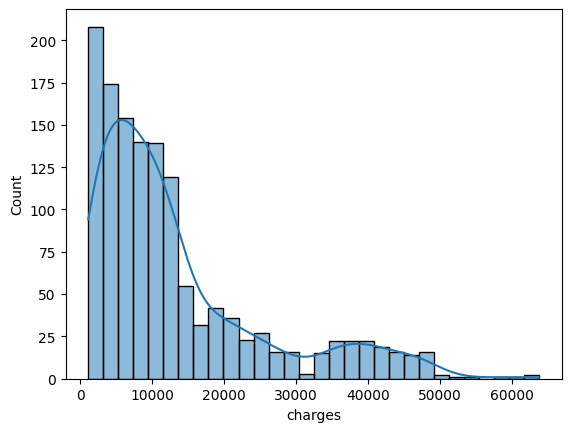

In [8]:
# Charges distribution:

sns.histplot(data_frame_day4["charges"], kde=True) # kde = Kernel Density Estimation produces a smooth estimate.

In [9]:
# Charges distribution is deviates to left.

In [10]:
# Correlation among other variables:

correlations = data_frame_day4.corr() # Compute correlation of columns, excluding null values.

C:\Users\dafda\AppData\Local\Temp\ipykernel_3760\269147381.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data_frame_day4.corr() # Compute correlation of columns, excluding null values.


In [11]:
correlations["charges"].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

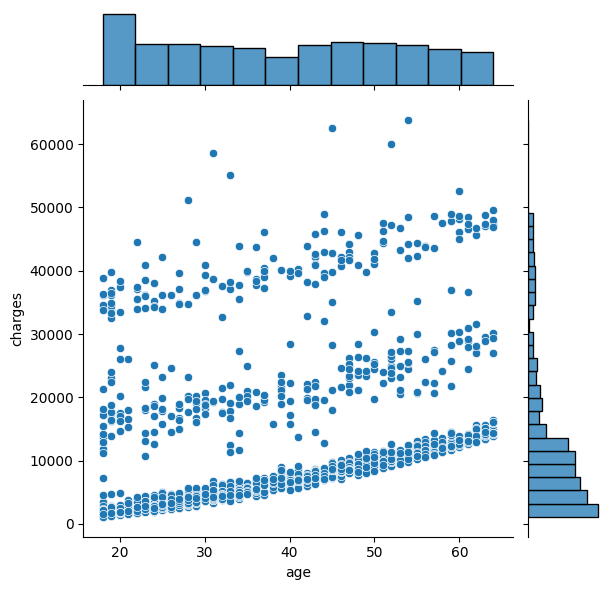

In [13]:
# In the case of numeric variables, the age is the most correlated one.

sns.jointplot(data=data_frame_day4, x="age", y="charges")

<AxesSubplot: xlabel='age', ylabel='charges'>

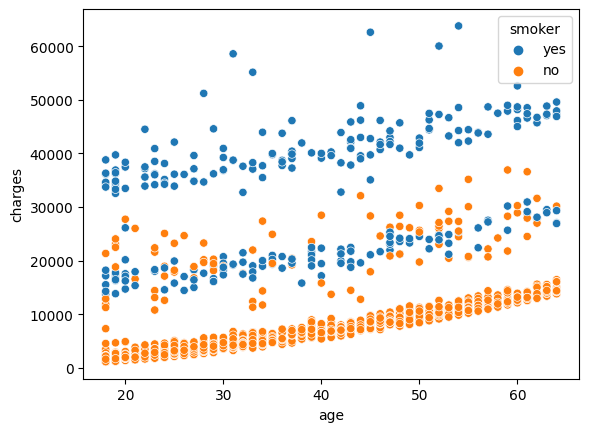

In [15]:
# We see that there's an increase in the charges when there is an increase in the age.

sns.scatterplot(x = data_frame_day4['age'], y = data_frame_day4['charges'], hue = data_frame_day4['smoker'])
# Adding hue = data_frame_day3['smoker'] tells sns we want to colour the data points for smoker and non-smoker differently.

### Linear Regression

As we could see in one of the graphs above: it seems that there is a linear relationship between the age variable and the target variable, charges. To model, we are going to use a simple **linear regression model**.

As the name implies, in the linear regression model a straight line is the best way to fit the data.
We are going to relate the charges (y) with the age attributes (x). In this model:

<h1><center>$y = mx+y_{0}$</center></h1>

A line can be defined by its slope $m$, and its $y$-intercept $y_{0}$ (the $y$ coordinate of its intersection with the $y$-axis).

Our algorithm will precisely find the best values for $m$ and $y_{0}$ that best fit the data. 

In [18]:
# We will create the two variables x and y:

X = data_frame_day4["age"]

y = data_frame_day4["charges"]

In [17]:
estimator = LinearRegression() # We initiate the estimator class, choosing the desired parameters.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# test_size should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split.
# In reality, no one can tell you exactly how much data you need for a predictive modeling problem. It's very problem-dependent.
# People say between 10%-30% is a good test size.
# Considering that it is a simple linear model where I am only considering one (or two) [...]
# [...] of the variables for the target, I think that 0.30 is enough and we can avoid overfitting.
# random_state simply sets a seed to the random generator, so that the train-test splits are always deterministic.

In [20]:
# Let's see the variables, the train set and the test set.

X

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [21]:
X_train

332     61
355     46
138     54
381     55
292     25
        ..
1095    18
1130    39
1294    58
860     37
1126    55
Name: age, Length: 936, dtype: int64

In [22]:
X_test

764     45
887     36
890     64
1293    46
259     19
        ..
701     50
672     36
1163    18
1103    58
1295    20
Name: age, Length: 402, dtype: int64

In [23]:
np.array(X_train).reshape(-1, 1) # Gives a new shape to an array without changing its data.

array([[61],
       [46],
       [54],
       [55],
       [25],
       [47],
       [32],
       [26],
       [55],
       [36],
       [43],
       [22],
       [38],
       [54],
       [42],
       [20],
       [25],
       [57],
       [25],
       [32],
       [40],
       [19],
       [35],
       [45],
       [33],
       [28],
       [33],
       [57],
       [33],
       [44],
       [45],
       [31],
       [34],
       [24],
       [38],
       [43],
       [56],
       [53],
       [26],
       [23],
       [43],
       [39],
       [45],
       [19],
       [60],
       [22],
       [55],
       [19],
       [62],
       [19],
       [50],
       [25],
       [63],
       [50],
       [40],
       [59],
       [23],
       [46],
       [33],
       [55],
       [50],
       [36],
       [23],
       [32],
       [43],
       [38],
       [39],
       [55],
       [20],
       [41],
       [27],
       [26],
       [18],
       [39],
       [32],
       [57],
       [54],

Why we are doing the reshape? Regression models need to know that a list of values is a series of observations for a single variable **or** a single observation for a series of features. The *LinearRegression* model from sklearn doesn't know that at the beggining. As we put it right now: we have 936 values for the age feature.

### Train the model

In [24]:
model = estimator.fit(np.array(X_train).reshape(-1, 1), y_train)

In [27]:
# Let's see now the coefficients the model found:

$y$-intercept $y_{0}$

In [26]:
y_0 = model.intercept_ # The independent term in the linear model.

y_0

3673.8368753317463

Slope $m$

In [28]:
m = model.coef_[0]

m

247.5995509234235

Our final model is:

<h1><center>$charges = 247.59*age+3673.83$</center></h1>

What the model means: for each year that the person's age increases, the charges are increased by 247.59 dollars. The price of the minimum policy to be paid (regardless of the age) is 3673.83 dollars.

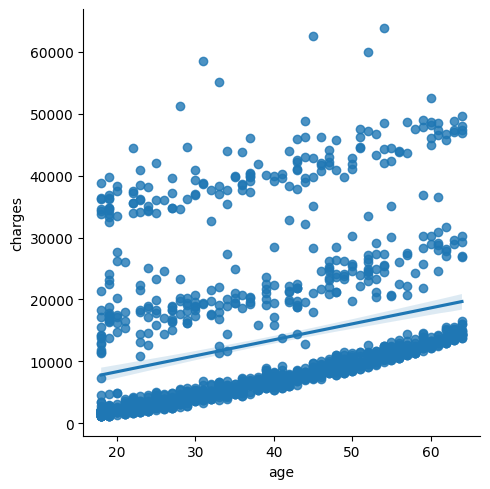

In [29]:
# To visualize the linear model:

sns.lmplot(data=data_frame_day4, x="age", y="charges")

As can be seen, yes, the age of a policy holder is significant in explaining the associated charges. However, and as mentioned in previous days, whether or not the person smokes is also very important to be considered. For the same reason, at first glance, the accuracy of this linear model needs to be clearly improve. For example, a non-smoker policy holder may end up paying more charges than necessary with our model.

In [30]:
# Let's do some toy predictions:

x = 30 # My age. I am a non-smoker.
y = model.intercept_ + model.coef_[0]*x

print("Charges:", y)

Charges: 11101.82340303445


In [31]:
# Let's do even more predictions now:

np.array(X_test).reshape(-1, 1)

array([[45],
       [36],
       [64],
       [46],
       [19],
       [34],
       [19],
       [64],
       [28],
       [49],
       [30],
       [41],
       [29],
       [46],
       [60],
       [47],
       [49],
       [47],
       [46],
       [43],
       [25],
       [43],
       [19],
       [22],
       [50],
       [54],
       [60],
       [27],
       [47],
       [18],
       [40],
       [57],
       [21],
       [30],
       [26],
       [45],
       [21],
       [43],
       [52],
       [36],
       [19],
       [22],
       [56],
       [59],
       [33],
       [59],
       [21],
       [25],
       [43],
       [31],
       [63],
       [18],
       [40],
       [18],
       [56],
       [50],
       [30],
       [31],
       [58],
       [53],
       [63],
       [30],
       [61],
       [42],
       [52],
       [28],
       [21],
       [52],
       [25],
       [22],
       [38],
       [46],
       [48],
       [39],
       [44],
       [36],
       [27],

In [32]:
y_predictions = model.predict(np.array(X_test).reshape(-1, 1)) # We're using the trained model to make predictions using the test.

In [33]:
pd.Series(y_predictions) # One-dimensional ndarray with axis labels.

0      14815.816667
1      12587.420709
2      19520.208134
3      15063.416218
4       8378.228343
           ...     
397    16053.814422
398    12587.420709
399     8130.628792
400    18034.610829
401     8625.827894
Length: 402, dtype: float64

In [34]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
701      9541.69555
672      4399.73100
1163     2200.83085
1103    11363.28320
1295     1964.78000
Name: charges, Length: 402, dtype: float64

### Model performance

How do we evaluate the performance of our model?

Let's look at the residuals of the predictions. Residuals tell us how far our (test) data points are from the regression line. They are the errors of our model:

<h1><center>$R(y_{i})=y_{i}-\hat{y}_{i};$</center></h1>

where $R$ are the residuals, $y_{i}$ the observed value and $\hat{y}_{i}$ the value of the response variable predicted from the regression line. The ideal case would be: $y_{i}=\hat{y}_{i}$.

Therefore: **The more far the points are around the line, in general the worse our model is.**

One way to quantify this is through a metric known as $R^{2}$:

<h1><center>$R^{2}=1-\dfrac{\sum_{i=1}^{n} (y_{i}-\hat{y}_{i})^{2}}{\sum_{i=1}^{n} (y_{i}-\bar{y})^{2}}.$</center></h1>

Or:

<h1><center>$R^{2}=1-$Sum squared regression error/Sum squared total error</center></h1>

In [36]:
# R^2:

from sklearn.metrics import r2_score

print(f'Accuracy: {r2_score(y_test, y_predictions)}')

Accuracy: 0.10204905420336463


<AxesSubplot: xlabel='charges', ylabel='Count'>

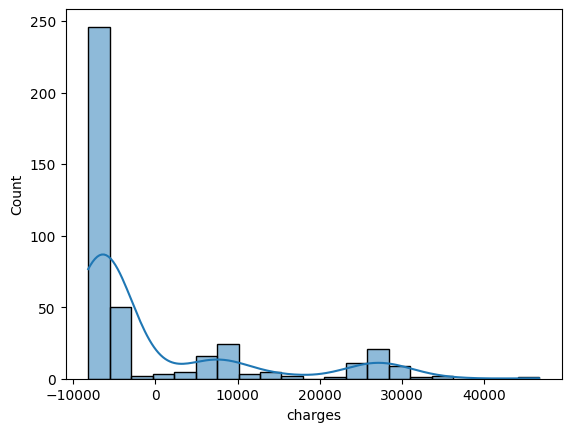

In [37]:
# We need to review our model(urgently) and consider more variables besides age for the linear model.

residuals = y_test - y_predictions

sns.histplot(x=residuals, kde=True)

## Results:

With a very simple linear model considering only one feature (age) for the target variable (charges), we have a very bad accuracy. Although there are many other metrics to evaluate a linear regression model that we could use (such as the root mean squared error), it is clear that we need to consider the information from the other variables. Especially: **whether the person smokes or not**. Our categorical variable that shows a stronger correlation with charges as we saw in the first days of this challenger.

A **multiple linear regression** is a good starting point:

<h1><center>$y=y_{0}+m_{1}X_{1}+m_{2}X_{2}+...+m_{n}X_{n}$</center></h1>.

We have a coefficient $n$ for each new feature.